In [8]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Stwórz macierz Hilberta H[i,j]=1/i+j-1 dla sensownie dużego rozmiaru macierzy (100×100, 200×200) i wyświetl ją przy pomocy imshow() z biblioteki matplotlib

In [2]:
N = 100
H = np.zeros((N, N))

In [4]:
for i in range(N):
    for j in range(N):
        H[i,j] = 1 / (i + j + 1)

In [5]:
H

array([[1.        , 0.5       , 0.33333333, ..., 0.01020408, 0.01010101,
        0.01      ],
       [0.5       , 0.33333333, 0.25      , ..., 0.01010101, 0.01      ,
        0.00990099],
       [0.33333333, 0.25      , 0.2       , ..., 0.01      , 0.00990099,
        0.00980392],
       ...,
       [0.01020408, 0.01010101, 0.01      , ..., 0.00512821, 0.00510204,
        0.00507614],
       [0.01010101, 0.01      , 0.00990099, ..., 0.00510204, 0.00507614,
        0.00505051],
       [0.01      , 0.00990099, 0.00980392, ..., 0.00507614, 0.00505051,
        0.00502513]])

In [7]:
np.linalg.cond(H, p='fro')

2.419315212258418e+19

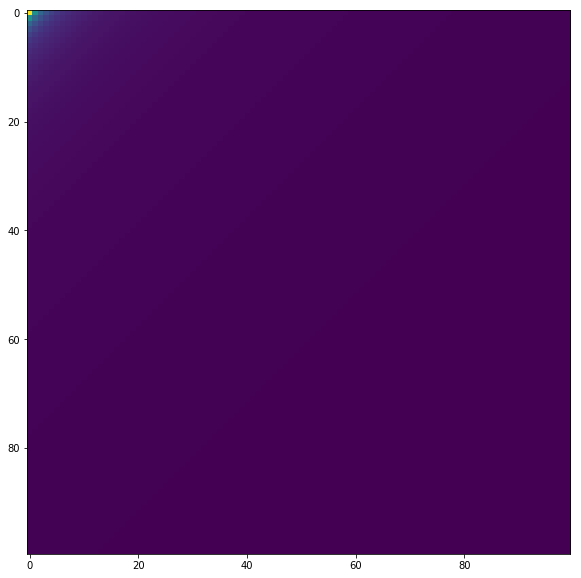

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(H);

## 2. Przypomnij sobie rozwiązywanie ukł. równań poprzez rozkład LU. Zaimplementuj ręcznię tę metodę (w wersji bez wyboru el. głównego) i spróbuj rozwiązać tym sposobem układ postaci A= np.array([[1e-18,1.0],[1.0,2.0]]) B=np.array([1.0,4.0]). Porównaj wynik z wynikiem scipy.linalg.solve(A,B). Dlaczego w przypadku tej macierzy wybór elementu głównego ma takie znaczenie?

In [19]:
import scipy
from scipy.linalg import solve

In [15]:
A= np.array([[1e-18,1.0],[1.0,2.0]])
B=np.array([1.0,4.0])

In [18]:
solve(A, B)

array([2., 1.])

In [ ]:
# dokończ
def lu_decomp(A):
    L = np.zeros_like(A)
    U = np.zeros_like(A)
    L[0, 0] = 1
    U[0, 0] = A[0, 0]
    L[1:, 0] = A[1:, 0] / A[0,0]
    U[0, 1:] = A[0, 1:]
    if len(A) == 2:
        L[1,1] = 1
        U[1,1] = A[1,1] - L[1,0] * U[0,1]
        return L, U
    # uzupełnienie schura
    outer = np.outer(L[1:, 0], U[0, 1:])
    L[1:, 1:], U[1:, 1:] = lu_decomp(A[1:, 1:] - outer)
    return L, U

## 3. Korzystając z metody scipy.rand(1000,1000) stwórz macierz losową. Użyj jej do przetestowania rozkładu macierzy  LU (scipy.linalg.lu) w wersji z permutacją i bez. Rozwiąż taki układ (dla b=scipy.rand(1000)) przy pomocy scipy.linalg.solve()

In [27]:
A = scipy.rand(1000,1000)
b=scipy.rand(1000)

In [31]:
# with perm
p, l, u = scipy.linalg.lu(A, permute_l=False)
y = solve(u, b)
x = solve(l, y)
x

array([-3.62901165e-01,  3.04133782e+00, -3.11542007e+00, -9.46858834e-01,
        1.80541275e-01,  8.97022423e-02, -4.62136198e-01, -2.42982425e+00,
       -2.16485316e-01, -1.63892869e+00, -2.28763419e+00, -1.68619280e+00,
        8.07558470e-01,  1.39440238e+00,  1.28871957e-01, -1.43800169e+00,
       -2.01033238e+00, -6.51193153e-01, -8.56625109e-01, -1.60183010e+00,
       -5.78609756e-02,  1.17601637e-01, -3.86842973e+00,  1.79353718e+00,
       -3.78519622e+00, -3.10101825e+00, -8.75159094e-01,  4.18382642e-01,
        2.09233479e+00,  3.91426301e+00,  2.54791404e+00,  2.34889812e+00,
        2.28330998e+00,  4.00165510e-01, -8.26324793e+00,  7.99960092e+00,
       -7.94204646e-01, -7.95163313e+00, -2.86474277e-01, -5.29102122e+00,
        1.62809722e+00, -3.83260273e-01,  1.22845194e+00, -5.25504682e+00,
       -1.09057176e+00, -1.13875147e+00, -5.18082785e+00, -3.30786418e+00,
       -2.35169524e+00, -1.61295078e-01,  2.39006321e+00, -4.12461491e-01,
        2.00034604e+00, -

In [32]:
# without perm
l, u = scipy.linalg.lu(A, permute_l=True)
y = solve(u, b)
x = solve(l, y)
x

array([ 9.31864314e-01, -1.60659535e-01, -1.69611339e+00,  1.47842266e+00,
       -1.43411309e+00,  3.74244188e-01, -1.50874120e+00, -1.09524238e+00,
       -3.52174225e-01, -6.01848641e-01, -1.97749930e+00, -7.77226828e-01,
        2.28581629e+00, -1.87519308e+00,  3.00979449e+00,  1.62670710e+00,
       -3.89457488e-01,  8.00791993e-01, -8.08412249e-01, -1.01109929e+00,
        1.35853227e+00, -1.42132126e+00,  4.39390667e-01, -1.50806217e+00,
       -2.24144961e-01, -9.13384282e-01,  8.64938184e-01,  4.92844671e-02,
        1.50650741e-01,  3.62094768e-02, -5.88754037e-01, -2.78509630e-01,
        6.72971805e-01,  9.71176234e-01, -1.28769778e+00,  2.19462755e+00,
       -1.63168218e+00, -3.88229956e+00,  2.32607622e+00,  1.29678930e-01,
        4.58593119e-01,  4.78862086e-01,  1.66722838e+00, -7.00272652e-01,
       -3.79034094e-02, -1.26373727e+00, -1.79061159e+00,  5.20777234e-01,
       -8.86640180e-01, -3.73117534e-01,  3.81023281e-01,  1.76672487e+00,
       -1.09433382e+00,  

## 4. Załóżmy, że mamy teraz jedną macierz A (my użyjemy losowej) i bardzo wiele różnych warunków brzegowych B (my wylosujemy 1000). Spróbuj rozwiązać wszystkie układy równań powstałe z przyrównania tej samej macierzy A do wielu różnych wektorów B. Czy można zamiast korzystać wielokrotnie z funkcji solve() coś przyspieszyć? Np. korzystając z funkcji lu()?

In [55]:
B = scipy.rand(1000, 100)

In [56]:
%%time
for i in range(B.shape[1]):
    x = solve(A, B[:, i])

CPU times: user 8.2 s, sys: 2.42 s, total: 10.6 s
Wall time: 2.97 s


In [57]:
%%time
l, u = scipy.linalg.lu(A, permute_l=True)
Y = solve(u, B)
X = solve(l, Y)

CPU times: user 516 ms, sys: 324 ms, total: 840 ms
Wall time: 249 ms


## 5. Duże macierze równań liniowych często powstają w problemach inżynierskich. Pobierz jedną z macierzy z kolekcji układów powstałych przy projektowaniu elementów samolotów Boeing (np. nr 38 ) i spróbuj wczytać ją jako macierz rzadką do ipython’a. Następnie rozwiąż ją dla losowych warunków brzegowych b.

In [70]:
from scipy import io
sparse_A = io.loadmat('bcsstk38.mat')
sparse_A = sparse_A['Problem']
sparse_A

array([[(array(['STIFFNESS MATRIX, AIRPLANE ENGINE COMPONENT'], dtype='<U43'), <8032x8032 sparse matrix of type '<class 'numpy.float64'>'
	with 355460 stored elements in Compressed Sparse Column format>, array(['Boeing/bcsstk38'], dtype='<U15'), array([[343]], dtype=uint16), array(['1995'], dtype='<U4'), array(['R. Grimes'], dtype='<U9'), array(['T. Davis'], dtype='<U8'), array(['structural problem'], dtype='<U18'))]],
      dtype=[('title', 'O'), ('A', 'O'), ('name', 'O'), ('id', 'O'), ('date', 'O'), ('author', 'O'), ('ed', 'O'), ('kind', 'O')])

In [64]:
scipy.sparse.linalg(sparse_A, )

dict